In [16]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [17]:
def plot(axes, x, y, title):
    axes.scatter(x, y, s=6)
    axes.set_title(title)
    # axes.set_ylabel(title)
    # axes.set_xlabel('Temperatura')


In [18]:
from importlib import reload
try:
    reload(recopilar_data)
except NameError:
    import recopilar_data
    
# data = pd.read_csv('alldata.dat', sep='\s+')
data_raw = pd.read_csv('alldata.dat', sep='\s+')
data_raw['amag'] = abs(data_raw['magnetization'])
data_raw.head(10)

,size,temperature,job,energy,energy^2,magnetization,magnetization^2,amag
0,20,2.94,2,-338.234306,115996.820472,-3.209116,5653.698521,3.209116
1,20,2.94,10,-337.087565,115056.326269,-2.522991,5200.554978,2.522991
2,20,2.94,9,-335.721711,114254.023191,-4.504598,4529.901639,4.504598
3,20,2.94,3,-336.910036,114982.979608,8.840464,6370.394242,8.840464
4,20,2.94,7,-338.766893,116268.359856,7.346661,5205.327469,7.346661
5,20,2.94,5,-338.491803,116053.764094,7.359456,5809.572171,7.359456
6,20,2.94,4,-335.123551,113798.474210,-9.297081,4531.032387,9.297081
7,20,2.94,1,-336.307077,114540.743703,4.646142,4936.742103,4.646142
8,20,2.94,8,-334.227909,113141.098760,0.476609,4979.649740,0.476609
9,20,2.94,6,-336.166333,114507.195522,-3.820072,5373.413834,3.820072


In [19]:
data = data_raw.groupby(['size','temperature'], as_index=False).mean().drop('job', axis=1)
i = 85
data.loc[i:i+10]

,size,temperature,energy,energy^2,magnetization,magnetization^2,amag
85,20,2.72,-381.072211,146954.802719,1.945462,8974.580408,11.949620
86,20,2.74,-375.936665,142992.754898,2.632227,8091.951379,11.586725
87,20,2.76,-370.680528,139045.652779,-2.435586,7567.870292,13.519792
88,20,2.78,-367.632787,136783.004558,-1.128269,7694.471811,9.380008
89,20,2.80,-364.964734,134901.077009,-0.845822,7559.693403,6.176489
90,20,2.82,-358.635106,130205.553619,-2.223511,6375.210396,4.701399
91,20,2.84,-355.219352,127743.043583,0.517873,6574.146661,5.796721
92,20,2.86,-352.165374,125625.349220,4.682127,6351.414634,9.310356
93,20,2.88,-347.372091,122207.846461,-1.684126,5551.251180,9.948181
94,20,2.90,-343.639024,119589.288764,-2.603519,5333.094762,6.575690


In [22]:
data['N'] = data['size']**2
data['Cv'] = (data['energy^2']-data['energy']**2)/(data['temperature']**2)*data['N']
data['X'] = (data['magnetization^2']-data['amag']**2)*data['N']/data['temperature']
data['E'] = data['energy'] / data['N']
data['M'] = data['amag'] / data['N']



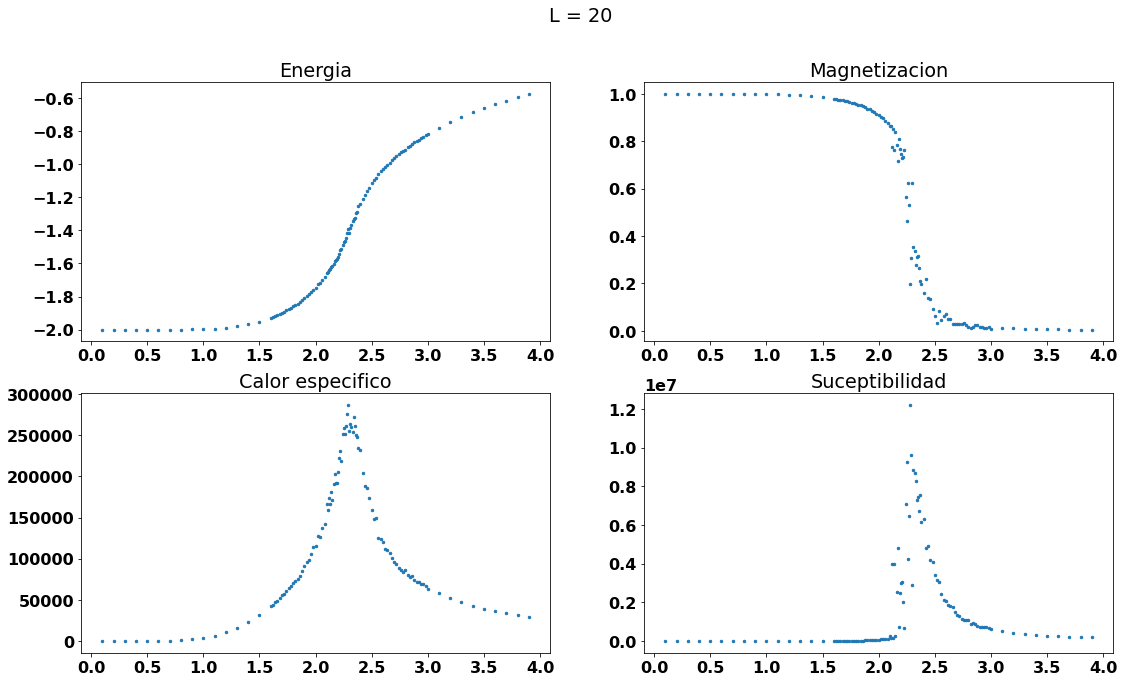

In [23]:
for s in data['size'].unique():
    dataf = data[data['size']==s]
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(f'L = {s}')
    plot(ax2, dataf['temperature'], dataf['M'], 'Magnetizacion')
    plot(ax1, dataf['temperature'], dataf['E'], 'Energia')
    plot(ax3, dataf['temperature'], dataf['Cv'], 'Calor especifico')
    plot(ax4, dataf['temperature'], dataf['X'], 'Suceptibilidad')

plt.show()